In [64]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

In [65]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)
circ.cx(qr[0], qr[1])
def gate_apply(user_input):
    if(user_input) == "X":
        circ.x(qr[0])
    if(user_input) == "Y":
        circ.y(qr[0])
    if(user_input) == "Z":
        circ.z(qr[0])
    if(user_input) == "H":
        circ.h(qr[0])

In [66]:
gate_choice = input("Choose gate:")
# gate_choice2 = input("Choose gate:")

Choose gate:X
Choose gate:Y


Choose gate:X
Choose gate:Y


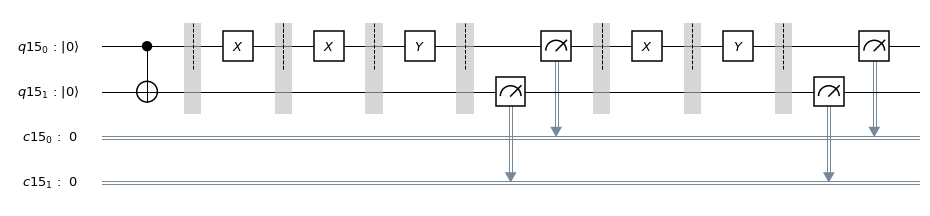

In [77]:
circ.barrier(qr[0], qr[1])
gate_choice = input("Choose gate:")
gate_apply(gate_choice)
circ.barrier(qr[0], qr[1])
gate_choice = input("Choose gate:")
gate_apply(gate_choice)
circ.barrier(qr[0], qr[1])
circ.measure(qr,cr)
circ.draw(output = 'mpl')


In [70]:
# Use the BasicAer qasm_simulator backend
from qiskit import BasicAer
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'01': 1000}


In [72]:
# Use the BasicAer statevector_simulator backend
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

# Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector in a manner that contains a comma-delimited string.
quantum_state


array([0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j])

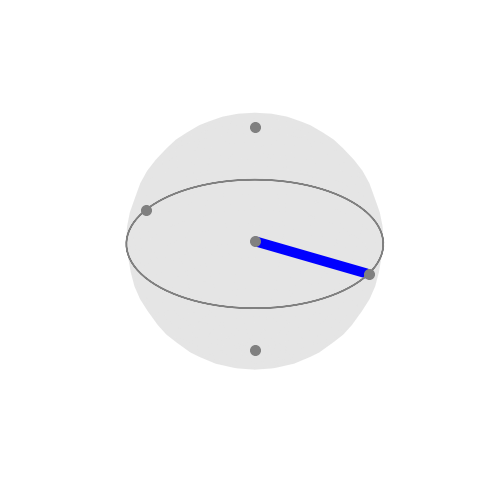

In [73]:
from qiskit.tools.visualization import plot_state_qsphere
plot_state_qsphere(quantum_state)

In [74]:
# Use the BasicAer qasm_simulator backend
from qiskit import BasicAer
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'01': 1000}


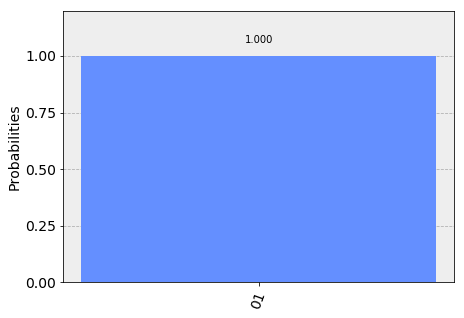

In [75]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)